In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings("ignore")


In [50]:
df = pd.read_csv("ML project data/train.csv")
df_test = pd.read_csv("ML project data/test.csv")

In [51]:
df.dropna(subset=["value_eur"], inplace=True)

In [52]:
# List of the columns you want to keep
columns_to_keep = [
    "player_positions", "overall", "potential", "value_eur", "wage_eur", "age", "height_cm", "weight_kg", 
    "club_team_id", "league_name", "league_level", "club_position", "club_joined", "club_contract_valid_until",
    "preferred_foot", "weak_foot", "skill_moves", "international_reputation", "work_rate", 
    "release_clause_eur", "pace", "shooting", "passing", "dribbling", "defending", "physic", "attacking_crossing", 
    "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys", 
    "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", 
    "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", 
    "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", 
    "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", 
    "mentality_vision", "mentality_penalties", "mentality_composure", "defending_marking_awareness", 
    "defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_diving", "goalkeeping_handling", 
    "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes", "goalkeeping_speed"
]

# Filter the DataFrame to keep only the specified columns
df_filtered = df[columns_to_keep]

# Check the result
df_filtered.head()


,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_name,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,ST,58,76,525000.0,952.712115,18,180,70,15005.0,Belgian Jupiler Pro League,...,43,13,19,17,7,6,8,10,7,NaN
1,"CM, CDM",55,75,350000.0,902.232819,19,179,68,1939.0,English League Championship,...,48,40,48,45,14,8,5,14,11,NaN
2,"CAM, CM",53,66,230000.0,2873.818374,21,180,65,12.0,English League Championship,...,52,26,23,31,14,8,13,9,6,NaN
3,GK,60,71,475000.0,678.608124,21,185,86,112115.0,Korean K League 1,...,26,8,14,12,60,60,54,63,61,23.0
4,CB,63,65,475000.0,1911.674228,28,185,70,631.0,Scottish Premiership,...,67,62,63,62,11,12,6,11,14,NaN


- target guided ordinal encoding
- mean encoding -> better to use median

-> for categorical variables 

"club_team_id", "league_name", "league_level", "club_position", player_positions

In [53]:
# date columns 
start_date = float(2021) # year when dataset was recorded 
df_filtered["years_left_contract"] = df_filtered["club_contract_valid_until"]-start_date

df_filtered['club_joined'] = pd.to_datetime(df_filtered['club_joined'], format='%Y-%m-%d')
df_filtered["years_in_club"] = start_date - df_filtered["club_joined"].dt.year

In [54]:
df_filtered.drop(columns=["club_contract_valid_until", "club_joined"], inplace=True)

In [55]:


df_filtered[["work_attack","work_defense"]] = df_filtered["work_rate"].str.split("/", expand=True)

In [57]:
maps = {"Low":1, "Medium":2, "High":3}
df_filtered["work_attack"] = df_filtered["work_attack"].map(maps)
df_filtered["work_defense"] = df_filtered["work_defense"].map(maps)

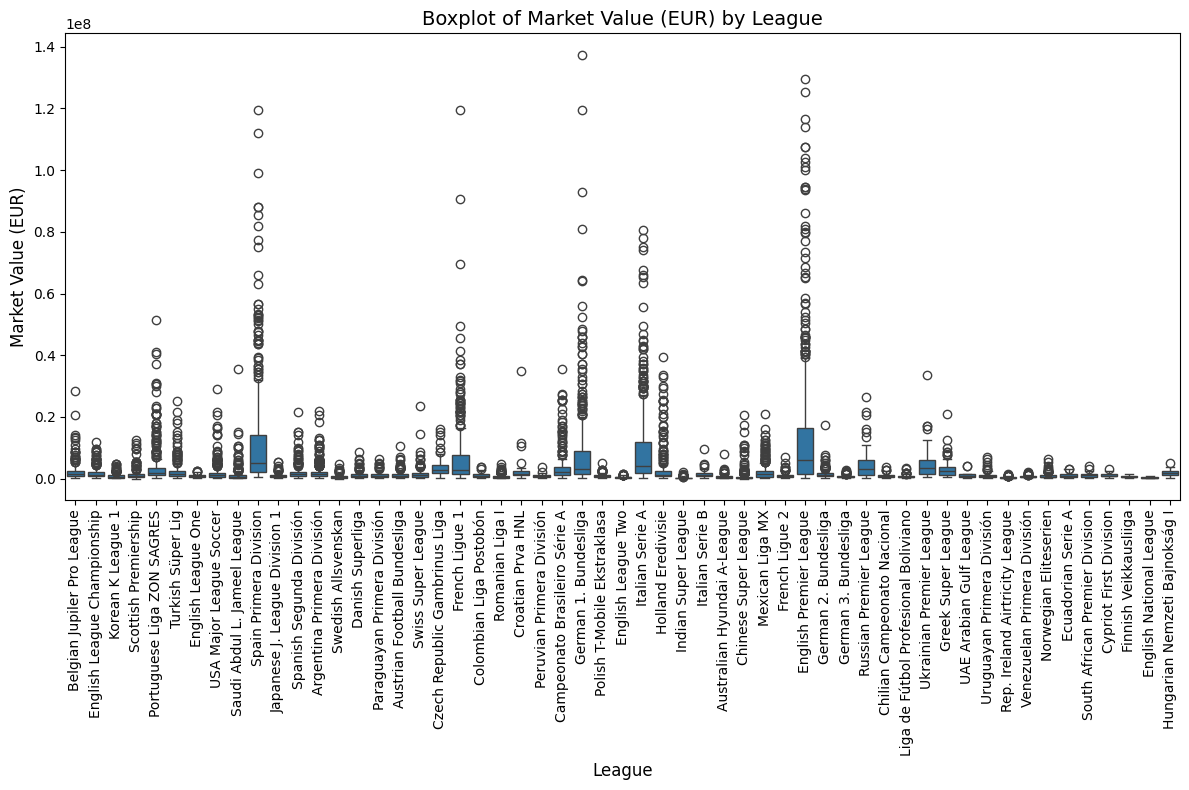

In [48]:
# Group data by 'league_name' and plot a boxplot of 'value_eur' for each league
plt.figure(figsize=(12, 8))
sns.boxplot(x='league_name', y='value_eur', data=df)

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=90)

# Set plot title and labels
plt.title('Boxplot of Market Value (EUR) by League', fontsize=14)
plt.xlabel('League', fontsize=12)
plt.ylabel('Market Value (EUR)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()